*Adapted from: https://keras.io/examples/vision/mnist_convnet/*

# Setup

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import layers
#print(keras.__version__)
keras.backend.backend()
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
data= mnist.load_data()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:992)

In [2]:
digits = datasets.load_digits()


In [5]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
x_train, x_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)



# Load the data

In [7]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = data

# Display the data

TypeError: Invalid shape (64,) for image data

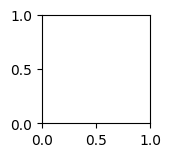

In [8]:
plt.clf()
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis("off")

plt.show()

# Prepare the data

In this instance we keep the original shape of the data (ie. 28x28) as it can be flatten by Keras later.

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Model / data parameters
num_classes = 10
input_shape = x_train.shape[1:]

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Build the model

We have the usual input and output layer plus just after the input layer we have a flatten layer to make sure the data passed to our network is 1D. Next we have three fully connected hidden layers of various size but all uses the ReLU activation function. The final activation of the output layer is the Softmax function.

In [ ]:
model = keras.Sequential(
    [
        layers.InputLayer(input_shape=input_shape),
        layers.Flatten(),
        layers.Dense(48, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(48, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

# Train the model

We train the model with a batch size of 128, ie 128 samples were passed through the network and the errors averaged before we adjusted the weights, then the next 128 samples were passed through. The network is trained for a total of 15 epochs (15 total passes through the whole training dataset).

The loss function in use here is categorical cross-entropy which is a common loss function used for classification problems. We are also using the ADAM optimizer here to control the overall learning rate without defining a constant learning rate.

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the trained model

We expect a test accuracy of about 97% here.

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])